In [1]:
# This notebook is a small example of a binary classification problem.
# The data set used in this notebook is from the UCI machine Learning Repository's Mushroom Data Set.
# https://archive.ics.uci.edu/ml/datasets/mushroom
# The objective of this notebook is to do some simple data manipulations and handlings.

# lets import the libraries and data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# importing data, we have to set the header to None because the data does not contain header.
df = pd.read_csv('agaricus-lepiota.data', header=None)

# checking the data
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
# It is all greek to me, and this is because we did not have the header and the attribute information.
# the following is the attribute information from the repository.
'''
Attribute Information:

0. classes: edible=e, poisonous=p
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

'''

# okay, then lets rename all the column names base on the attribute infromation.

header = ['classes', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing',
          'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
          'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
          'ring_type', 'spore_print_color', 'population', 'habitat']

# replacing column names
df.columns = header
df.head()


,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Then we want to check does the dataset contain any null value.
# It looks like the dataset does not contain any null value, which is a good thing.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
classes                     8124 non-null object
cap_shape                   8124 non-null object
cap_surface                 8124 non-null object
cap_color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill_attachment             8124 non-null object
gill_spacing                8124 non-null object
gill_size                   8124 non-null object
gill_color                  8124 non-null object
stalk_shape                 8124 non-null object
stalk_root                  8124 non-null object
stalk_surface_above_ring    8124 non-null object
stalk_surface_below_ring    8124 non-null object
stalk_color_above_ring      8124 non-null object
stalk_color_below_ring      8124 non-null object
veil_type                   8124 non-null object
veil_color                  8124 non-null object
ring_number

In [4]:
# We can see the dataset contains only categorical data in the form of characters.
# Then, the next thing we have to do is to convert the char data into numerical data.
# In here, I would like to use LabelEncoder to convert the data.
# What LabelEncoder does is convert categorical data into numerical data like this:
# ['a', 'b'] -> [0, 1]

from sklearn.preprocessing import LabelEncoder

# We have 23 attributes, but the LabelEncoder only take 1d array.
# I think it is better to have a dictionary to hold all LabelEncoders.
# It should be easier to convert back into categorical data when we see the result.
lb_encoders = {}

# lets loop through all the columns
for name, values in df.iteritems():
    lb_encoders[name] = LabelEncoder().fit(values)
    df[name] = lb_encoders[name].transform(values)
    
# take a look on the dataframe
df.head()

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [5]:
# The data look alright, now we need a classifier to help us for determining which kinds of mushroom are edible.
# As a normal human being, the determination process should be similar to the following:
# If the cap_shape of the mushroom is equal to X, then look at the gill_spacing.
# If the gill_spacing is equal to Y, then take a sniff of it.
# If the odor is not Z, then it should be edible.

# Therefore, a simple descision tree should work well on the data.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

target = df['classes']
features = df.drop(['classes'], axis=1)

# lets split the data into training set and testing set.
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=42)

clf = DecisionTreeClassifier()

# train the decision tree with the training set.
clf.fit(train_x, train_y)

# test the classifier with the testing set.
preditions = clf.predict(test_x)

# print the result as a classification report to see the performance.
print(classification_report(test_y, preditions, target_names=['edible', 'poisonous']))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

   micro avg       1.00      1.00      1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



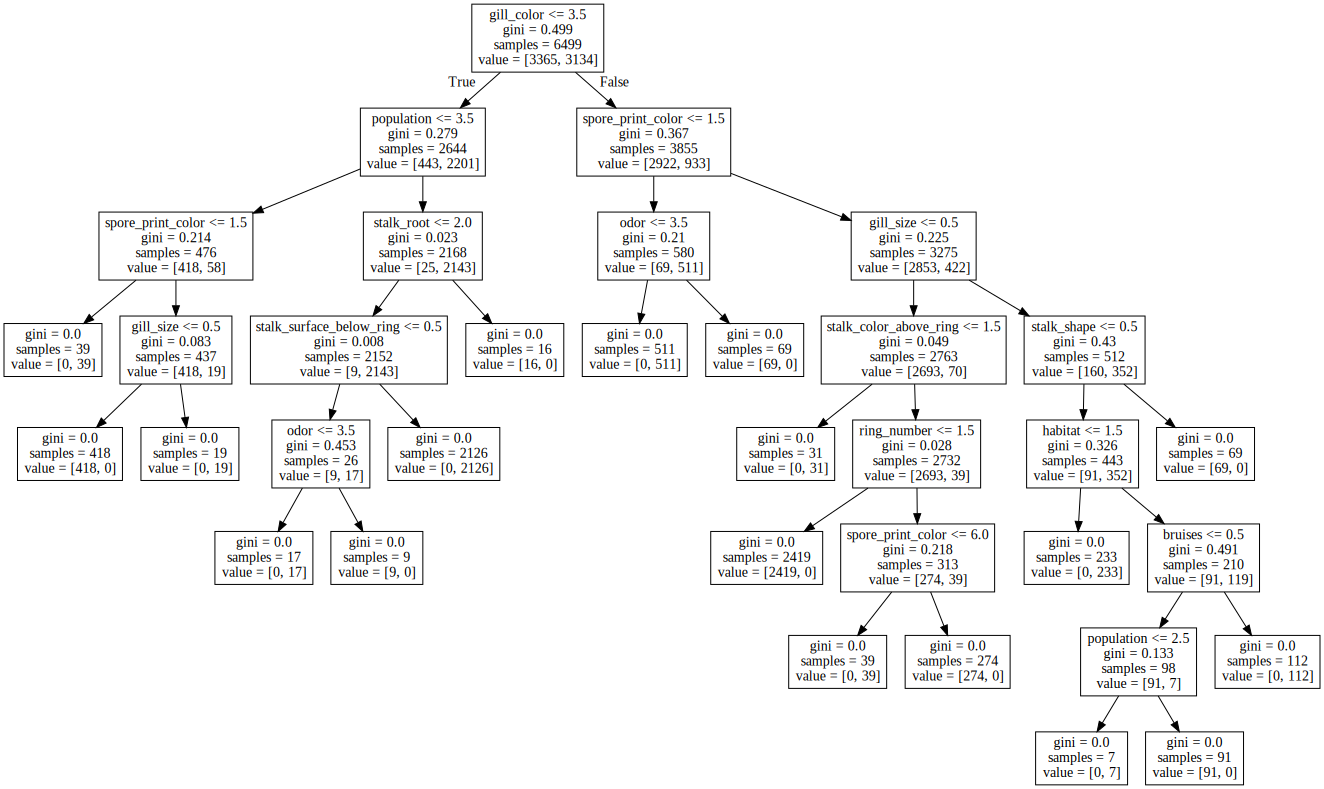

In [18]:
from IPython.display import SVG
from sklearn import tree
from graphviz import Source

# lets take a look on the decision tree.
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=features.columns))
SVG(graph.pipe(format='svg'))

In [15]:
# From the classification report above, our classifier is very successful on predicting at least on the testing set.
# In reality, one poisonous mushroom slips through our detection could be a fatal error.
# lets do a 5-fold cross validation just to be sure.

from sklearn.model_selection import cross_validate

# Using the decision tree as our estimator
cv_results = cross_validate(DecisionTreeClassifier(), features, target, cv=5)

# okay, lets examine is there any poisonous mushroom slip passed our dectection.
print(cv_results['test_score'])

[0.88191882 1.         0.99753846 1.         0.71921182]


From the result above, although our classifier has a very high scoring, it is not perfect.
Is there any possible way to isolate edible mushrooms from the poisonous mushrooms?
From the decision tree above, there are three decision paths we may able to use.
1: gill_color <= 3.5 --> population <=3.5 --> spore_print_color >= 1.5 --> gill_size <= 0.5
2: gill_color > 3.5 --> spore_print_color > 1.5 --> gill_size <= 0.5 --> stalk_color_above_ring > 1.5 -->
   ring_number <= 1.5
3: gill_color > 3.5 --> spore_print_color > 1.5 --> gill_size <= 0.5 --> stalk_color_above_ring > 1.5 -->
   ring_number > 1.5 --> spore_print_color > 6.0

The first path isolated 418 edible mushrooms out.
The second path isolated 2419 edible mushrooms out.
The thrid path isolated 274 edible mushrooms out.

The loss of the edible mushroom is equal to (3365 - 418 - 2419 - 274) / 3365 = 7.5%

lets see is it still true when these rules apply on the whole dataset

In [34]:
# For the first path
condition = (df['gill_color'] <= 3.5) & (df['population'] <= 3.5) & (df['spore_print_color'] >= 1.5) & (df['gill_size'] < 0.5)
path_1 = df.loc[condition]

# check for any poisonous mushroom
# The mushroom resulted from the path 1 seem to be all edible
print(path_1['classes'].value_counts())

# It seems promising, lets try other paths.
condition = (df['gill_color'] > 3.5) & (df['spore_print_color'] > 1.5) & (df['gill_size'] <= 0.5) & (df['stalk_color_above_ring'] > 1.5)

condition_path_2 = condition & (df['ring_number'] <= 1.5)
condition_path_3 = condition & (df['ring_number'] > 1.5) & (df['spore_print_color'] > 6.0)

path_2 = df.loc[condition_path_2]
path_3 = df.loc[condition_path_3]

print(path_2['classes'].value_counts())
print(path_3['classes'].value_counts())

0    512
Name: classes, dtype: int64

In [37]:
# Based on the condition obtained from the decision path, all paths successfully remove poisonous mushroom
# With only 8% loss on edible mushrooms 1 - (512+3024+336) / 4208

0.9201520912547528

In [44]:
# Lets convert the edible mushroom dataframe back to the original

edible = pd.concat([path_1, path_2, path_3])
for name, values in edible.iteritems():
    edible[name] = lb_encoders[name].inverse_transform(values)

edible.head()

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m
10,e,x,y,y,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,n,g
24,e,b,s,w,t,l,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m
30,e,b,s,y,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,n,m


In [60]:
# Create a dataframe of mushroom which we consider they are poisonous.
# Also, convert the label back to the original

poisonous = df.loc[~np.isin(df.index.values, edible.index.values)]
for name, values in poisonous.iteritems():
    poisonous[name] = lb_encoders[name].inverse_transform(values)

poisonous.head()

/home/pandaman/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
13,p,x,y,w,t,p,f,c,n,k,...,s,w,w,p,w,o,p,n,v,u
15,e,s,f,g,f,n,f,c,n,k,...,s,w,w,p,w,o,p,n,y,u


In [68]:
# Now, for a better understanding to other human beings
# Lets convert the char data into readable string
# I copy the attribute information into a text file
# It is easier to write read the file than copy values by hand

elements_dict = {}

with open('attribute.txt') as f:
    for line in f:
        # remove all spacing
        line = line.strip().replace(" ", "").replace('-', '_')
        line = line.split(':')
        name = line[0]
        elements = line[1].split(',')
        temp_dict = {}
        for e in elements:
            pair = e.split('=')
            temp_dict[pair[1]] = pair[0]
        elements_dict[name] = temp_dict
        


23

In [73]:
# start replacing
for col in elements_dict.keys():
    edible[col] = edible[col].replace(elements_dict[col])
    poisonous[col] = poisonous[col].replace(elements_dict[col])

/home/pandaman/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [74]:
# export two dataframe into csv for further visualization
edible.wr

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
8,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,pink,...,smooth,white,white,partial,white,one,pendant,black,several,grasses
13,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,brown,several,urban
15,edible,sunken,fibrous,gray,no,none,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,brown,solitary,urban
